In [77]:
import pandas as pd
import seaborn as sns
import matplotlib as plm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Questionario psicometrico

In [23]:
ris_questionario_dataviz = pd.read_csv('ris_questionario_dataviz.csv')

In [24]:
ris_questionario_dataviz.columns = ['Data', 'Utilita', 'Chiarezza', 'Informativita', 'Bellezza', 'Qualita_complessiva', 'Note']
ris_questionario_dataviz

,Data,Utilita,Chiarezza,Informativita,Bellezza,Qualita_complessiva,Note
0,2022/01/29 5:56:16 PM CET,1,4,3,5,2,scsdc
1,2022/01/29 5:56:40 PM CET,2,6,4,5,5,cccc


In [27]:
ris_melt = ris_questionario_dataviz.melt(id_vars=['Data', 'Note'], var_name="Aggettivo", value_name="Voto").sort_values('Aggettivo')
ris_melt

,Data,Note,Aggettivo,Voto
6,2022/01/29 5:56:16 PM CET,scsdc,Bellezza,5
7,2022/01/29 5:56:40 PM CET,cccc,Bellezza,5
2,2022/01/29 5:56:16 PM CET,scsdc,Chiarezza,4
3,2022/01/29 5:56:40 PM CET,cccc,Chiarezza,6
4,2022/01/29 5:56:16 PM CET,scsdc,Informativita,3
5,2022/01/29 5:56:40 PM CET,cccc,Informativita,4
8,2022/01/29 5:56:16 PM CET,scsdc,Qualita_complessiva,2
9,2022/01/29 5:56:40 PM CET,cccc,Qualita_complessiva,5
0,2022/01/29 5:56:16 PM CET,scsdc,Utilita,1
1,2022/01/29 5:56:40 PM CET,cccc,Utilita,2


### Stacked bar chart

In [129]:
percent_2_gruppi = ris_melt.groupby('Aggettivo')['Voto'].agg([lambda x: int(sum(x<=3)/len(x)*100), lambda x: int(sum(x>3)/len(x)*100), lambda x: 100]).reset_index()
percent_2_gruppi.columns = ['Aggettivo', 'Voti 0-3', 'Voti 4-6', 'Max']
#percent_2_gruppi.drop('Count', axis = 1, inplace = True)
percent_2_gruppi

,Aggettivo,Voti 0-3,Voti 4-6,Max
0,Bellezza,0,100,100
1,Chiarezza,0,100,100
2,Informativita,50,50,100
3,Qualita_complessiva,50,50,100
4,Utilita,100,0,100


<AxesSubplot:xlabel='Aggettivo'>

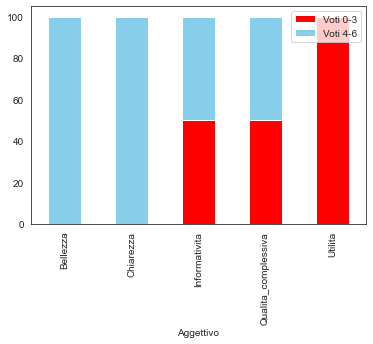

In [134]:
percent_2_gruppi[['Aggettivo', 'Voti 0-3', 'Voti 4-6']].plot(kind='bar', stacked=True, x = 'Aggettivo', color=['red', 'skyblue'])

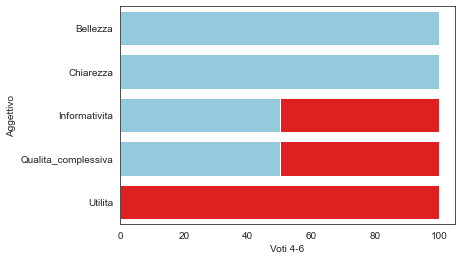

In [144]:
bar1 = sns.barplot(x="Max", y="Aggettivo", data=percent_2_gruppi, color='red')
bar2 = sns.barplot(x="Voti 4-6",  y="Aggettivo", data=percent_2_gruppi, color='skyblue', ci = 90)

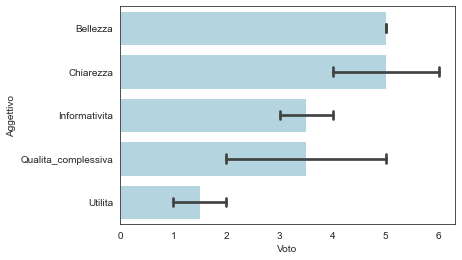

In [147]:
ax = sns.barplot(x="Voto", y="Aggettivo", data=ris_melt, ci=95, capsize=.2, color='lightblue')

### Grafico correlazioni

### Violin plot o Farfalla

<AxesSubplot:xlabel='Aggettivo', ylabel='Voto'>

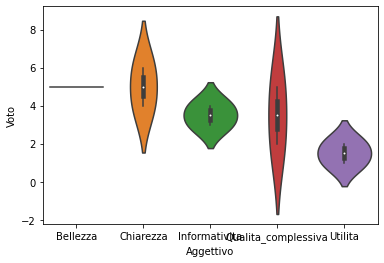

In [31]:
sns.violinplot(data=ris_melt, x='Aggettivo', y='Voto')

[Text(0, 0, 'Utile'),
 Text(1, 0, 'Chiara'),
 Text(2, 0, 'Informativa'),
 Text(3, 0, 'Bella'),
 Text(4, 0, 'Qualitá complessiva')]

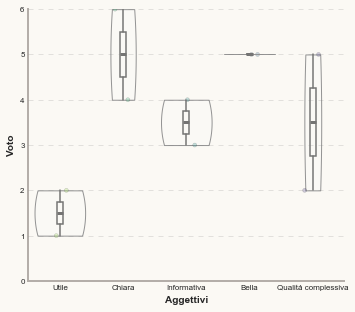

In [63]:
sns.set_style('white')

#Setting parametri utili
my_dpi = 300
fig, ax = plt.subplots(figsize= (1700/my_dpi, 1500/my_dpi))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
color_scale = ["#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3"]
linee_orizzontali = list(range(0, 7, 1))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 1.5},
    'whiskerprops':{'color':'#747473', 'linewidth':1.5, 'zorder':1},
    'medianprops':{'linewidth':'3', 'color':'#747473', 'solid_capstyle':'butt'},
    'meanprops':{"marker":"o","markerfacecolor":"#850e00", "markeredgecolor":"#850e00", 'zorder':3}
}

#Creazione violin plots
sns.violinplot(data=ris_melt, x='Aggettivo', y='Voto',
                    order=['Utilita', 'Chiarezza', 'Informativita', 'Bellezza', 'Qualita_complessiva'], \
                    linewidth=1, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    zorder = 0,\
                    ax = ax)
 
#Sovrapposizione box plots
sns.boxplot(data=ris_melt, x='Aggettivo', y='Voto', \
            order=['Utilita', 'Chiarezza', 'Informativita', 'Bellezza', 'Qualita_complessiva'], \
            width = 0.1, \
            showcaps = False,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS\
           )

#Sovrapposizione strip plots, con colore dei punti dipendente dal valore di umidità media
stripplot = sns.stripplot(data=ris_melt, x='Aggettivo', y='Voto',
                      order=['Utilita', 'Chiarezza', 'Informativita', 'Bellezza', 'Qualita_complessiva'], \
                      palette = "viridis_r", \
                      edgecolor = "k", \
                      jitter = 0.16, \
                      alpha = 0.25, \
                      linewidth = 0.4, \
                      s = 4,
                      zorder = 1,
                      ax = ax)

#Disegno delle linee in background 
for h in linee_orizzontali:
    if h == 50:
        ax.axhline(50, color='k', ls=(0, (5, 5)), alpha=0.5, zorder=6, lw = 1)
    else:
        ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=5, lw = 1)
        
#Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

#Personalizzazione degli assi (nomi e ticks)
ax.tick_params(length=0)
ax.set_ylim(0,6)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=8)
y_label = "Voto"
ax.set_ylabel(y_label, size=10, weight="bold")
ax.set_xlabel("Aggettivi", size=10, weight="bold", labelpad = 5)
xlabels = ['Utile', 'Chiara', 'Informativa', 'Bella','Qualitá complessiva']
ax.set_xticklabels(xlabels, size=8, ha="center", ma="center")